In [46]:
#Calcular Tempo 
import datetime
data_hora_atual_ini = datetime.datetime.now()
print(" \n Inicio",data_hora_atual_ini)

 
 Inicio 2024-04-05 00:21:55.177340


In [47]:
#Estudo de Caso 
#5-4 Analise de Imagens de Torax Pneumonia 
#Analise de Imagens Médicas 

#Importando as bibliotecas 

import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import keras
keras.config.disable_traceback_filtering()



In [48]:
#numpy as np: NumPy é uma biblioteca fundamental para computação numérica em Python. Ela fornece uma maneira conveniente de trabalhar com arrays multidimensionais e operações matemáticas neles.

#pandas as pd: Pandas é uma biblioteca de análise de dados em Python. Ela oferece estruturas de dados flexíveis e eficientes para manipulação e análise de dados, especialmente para dados tabulares e séries temporais.

#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img: TensorFlow é uma biblioteca de código aberto para aprendizado de máquina e aprendizado profundo desenvolvida pelo Google. A submódulo keras fornece uma API de alto nível para construir e treinar modelos de aprendizado de máquina. ImageDataGenerator é uma ferramenta útil para pré-processamento de imagens em tempo real durante o treinamento de modelos de aprendizado profundo. load_img é usado para carregar imagens de um arquivo.

#from tensorflow.keras.utils import to_categorical: to_categorical é uma função usada para converter variáveis categóricas em representação one-hot encoding. Isso é comumente usado ao trabalhar com tarefas de classificação onde você tem várias classes.

#from sklearn.model_selection import train_test_split: Scikit-learn é uma biblioteca de aprendizado de máquina em Python. train_test_split é uma função útil para dividir conjuntos de dados em subconjuntos de treinamento e teste.

#import matplotlib.pyplot as plt: Matplotlib é uma biblioteca de visualização de dados em Python. matplotlib.pyplot fornece uma maneira conveniente de criar gráficos e visualizações em Python.

#import random: O módulo random fornece funções para gerar números pseudoaleatórios. Pode ser útil em várias tarefas, incluindo seleção aleatória de amostras de dados.

#import os: O módulo os fornece uma maneira de interagir com o sistema operacional subjacente em Python. Pode ser usado para manipular caminhos de arquivos, acessar variáveis de ambiente e outras tarefas relacionadas ao sistema operacional.

In [49]:
#Definindo as propriedades das imagens:

# Parâmtros de largura, altura, dimensões e quantidade de canais
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [50]:
#Image_Width: A largura das imagens em pixels.
#Image_Height: A altura das imagens em pixels.
#Image_Size: Uma tupla que contém a largura e a altura das imagens.
#Image_Channels: O número de canais de cor nas imagens. Neste caso, parece ser 3, o que sugere que você está lidando com imagens coloridas no formato RGB (Red, Green, Blue).
#Essas informações são úteis ao trabalhar com processamento de imagens, pois ajudam a garantir que as imagens tenham o tamanho e o formato corretos para o processamento adequado, especialmente ao usar frameworks como TensorFlow ou Keras para treinar modelos de aprendizado profundo.

In [51]:
#Preparando o conjunto de dados para o modelo de treinamento:

dir_treino = "D:\\Dados\\raio-x-torax\\raio-x-torax\\treino\\"
filenames=os.listdir(dir_treino)

# Após realizar o download e descompactar a pasta raio-x-torax.zip, localize o caminho correto do local
# da pasta. Você precisará acessar a pasta treino. Note que a cada pasta, é necessário o uso de barras
# duplas invertivas.

In [52]:
#dir_treino = 'D:/Dados/raio-x-torax/raio-x-torax/treino/': Define a variável dir_treino com o caminho para o diretório de treinamento onde os arquivos de imagem estão localizados.
#filenames = os.listdir(dir_treino): Usa a função os.listdir() para listar todos os arquivos e diretórios no caminho especificado em dir_treino. Isso retorna uma lista de strings contendo os nomes de todos os arquivos e diretórios no diretório de treinamento.

In [53]:
# Criando as categorias para o modelo
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='pneumonia':
        categories.append(1) # estabelecendo pneumonia como categoria 1
    else:
        categories.append(0) # estabelecendo normal como categoria 0

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

df.head(80)

,filename,category
0,normal.0.jpg,0
1,normal.1.jpg,0
2,normal.10.jpg,0
3,normal.11.jpg,0
4,normal.12.jpg,0
...,...,...
75,normal.77.jpg,0
76,normal.78.jpg,0
77,normal.79.jpg,0
78,normal.8.jpeg,0


In [54]:
#categories=[]: Cria uma lista vazia para armazenar as categorias.
#for f_name in filenames:: Itera sobre cada nome de arquivo na lista filenames.
#category=f_name.split('.')[0]: Divide o nome do arquivo usando o ponto como separador e considera a primeira parte como a categoria.
#if category=='pneumonia':: Verifica se a categoria é 'pneumonia'.
#categories.append(1): Se a categoria for 'pneumonia', adiciona 1 à lista de categorias.
#else:: Se não for 'pneumonia', ou seja, é 'normal'.
#categories.append(0): Adiciona 0 à lista de categorias.
#df=pd.DataFrame({'filename':filenames, 'category':categories}): Cria um DataFrame do pandas com as colunas 'filename' e 'category', onde 'filename' contém os nomes dos arquivos e 'category' contém as categorias correspondentes.
#df.head(80): Exibe as primeiras 80 linhas do DataFrame.

<Axes: xlabel='category'>

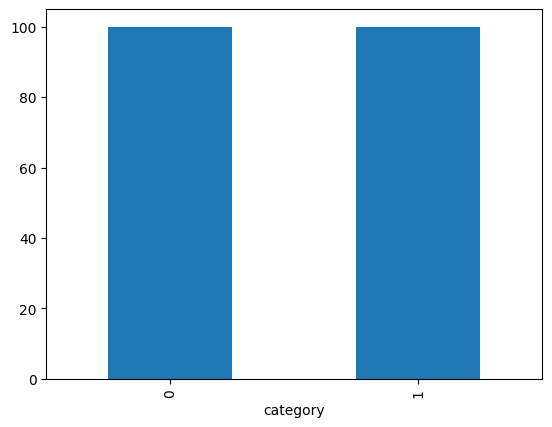

In [55]:
# Verificando a quantidade de imagens em cada categoria
df['category'].value_counts().plot.bar()

In [56]:
##df['category'].value_counts(): Conta o número de ocorrências de cada valor na coluna 'category' do DataFrame df. Isso retorna uma série pandas onde os índices são os valores únicos na coluna 'category' e os valores são as contagens correspondentes.
#plot.bar(): Gera um gráfico de barras da série retornada pelo value_counts(), onde cada barra representa a contagem de uma categoria.

In [57]:
#Criando o modelo da rede neural:
# Implementando o modelo sequencial e suas camadas de rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

d:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [58]:
#Sequential(): Cria um modelo sequencial, onde as camadas são empilhadas uma sobre a outra.
#Camadas convolucionais (Conv2D): São camadas que aplicam operações de convolução aos dados de entrada. Cada camada Conv2D possui um número específico de filtros e uma dimensão de kernel que define a operação de convolução a ser aplicada aos dados.
#Camadas de normalização de lote (BatchNormalization): Normaliza os ativações de entrada de cada camada, o que ajuda a acelerar o treinamento e a estabilizar o processo de aprendizado.
#Camadas de max pooling (MaxPooling2D): Reduz a dimensionalidade dos dados, mantendo as características mais importantes.
#Camadas de dropout (Dropout): São usadas para regularização, o que ajuda a prevenir o sobreajuste, desativando aleatoriamente um determinado número de unidades de uma camada durante o treinamento.
#Camadas totalmente conectadas (Dense): São camadas onde todos os neurônios de entrada estão conectados a todos os neurônios da camada seguinte.
#Camadas de ativação (Activation): Aplica uma função de ativação aos valores de saída das camadas densas. Neste caso, a função de ativação 'relu' é usada nas camadas convolucionais e densas, enquanto 'softmax' é usada na última camada densa para a classificação multiclasses.
#model.compile(): Compila o modelo, especificando a função de perda, o otimizador e as métricas a serem usadas durante o treinamento.
#No caso deste modelo, a função de perda é categorical_crossentropy, o otimizador é rmsprop e a métrica é accuracy.
#Este é um modelo típico de CNN usado para classificação de imagens. Ele consiste em várias camadas convolucionais seguidas por camadas de pooling e dropout, seguidas por camadas densas. Essa arquitetura é comumente usada e tem se mostrado eficaz em uma variedade de tarefas de visão computacional.

In [59]:
#Analisando o modelo:
# Visualizando o modelo sequencial e suas camadas
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [60]:
#O método summary() é usado para exibir um resumo do modelo, incluindo as camadas e os parâmetros de cada camada. Ele fornece uma visão geral útil da arquitetura do modelo, bem como do número de parâmetros treináveis e do tamanho da saída de cada camada.
#Ao executar esta linha de código, você verá um resumo detalhado do modelo, incluindo:
#A camada de entrada e a forma dos dados de entrada.
#Cada camada subsequente, incluindo o tipo de camada, a forma da saída e o número de parâmetros treináveis.
#O número total de parâmetros treináveis no modelo.

In [61]:
#Definindo as chamadas de retorno e taxa de aprendizado:
#chamada de retorno é um conjunto de funções a serem aplicadas em uma determinada etapa do procedimento do treinamento. Isso incluirá interromper o treinamento quando atingir uma certa pontuação de precisão/perda, para salvar o modelo após cada época bem-sucedida e ajustar as taxas de aprendizado
#Early Stop: Para evitar overfitting, interromperemos o aprendizado após 10 épocas e o valor val_loss não diminuirá.
#Redução da taxa de aprendizado: Reduziremos a taxa de aprendizado quando a precisão não aumentar em 2 etapas.

In [62]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [63]:
#EarlyStopping: Este callback é usado para interromper o treinamento prematuramente se não houver melhorias significativas na métrica monitorada ao longo de um determinado número de épocas (patience). Isso ajuda a evitar o sobreajuste, interrompendo o treinamento assim que o desempenho do modelo no conjunto de validação parar de melhorar.
#patience: Número de épocas para esperar antes de parar o treinamento se não houver melhoria na métrica monitorada.
#ReduceLROnPlateau: Este callback é usado para reduzir a taxa de aprendizado (learning rate) durante o treinamento se o desempenho do modelo no conjunto de validação não melhorar por um determinado número de épocas (patience).
#monitor: A métrica a ser monitorada. Neste caso, é 'val_acc', o que significa que estamos monitorando a acurácia no conjunto de validação.
#patience: Número de épocas para esperar antes de reduzir a taxa de aprendizado se não houver melhoria na métrica monitorada.
#verbose: Controla a verbosidade do output durante o treinamento.
#factor: Fator pelo qual a taxa de aprendizado será reduzida. A nova taxa de aprendizado será igual a learning_rate = learning_rate * factor.
#min_lr: O limite inferior para a taxa de aprendizado após a redução.

In [64]:
#Gerenciando os dados:

df["category"] = df["category"].replace({0:'normal', 1:'pneumonia'})
train_df,validate_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [65]:
#df["category"] = df["category"].replace({0:'normal', 1:'pneumonia'}): Esta linha está substituindo os valores numéricos da coluna 'category' do DataFrame df pelos rótulos correspondentes ('normal' para 0 e 'pneumonia' para 1). Isso é feito para tornar os dados mais legíveis e interpretáveis.
#train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42): Esta linha divide o DataFrame df em conjuntos de treinamento (train_df) e validação (validate_df). O conjunto de validação terá 20% dos dados, enquanto o conjunto de treinamento terá os 80% restantes. O parâmetro random_state=42 garante que a divisão seja sempre a mesma, o que é útil para reprodução.
#train_df = train_df.reset_index(drop=True): Esta linha redefine o índice do DataFrame train_df para começar de 0 e descarta o índice anterior.
#validate_df = validate_df.reset_index(drop=True): Similarmente, esta linha redefine o índice do DataFrame validate_df.
#total_train=train_df.shape[0]: Esta linha calcula o número total de amostras no conjunto de treinamento e armazena em total_train.
#total_validate=validate_df.shape[0]: Esta linha calcula o número total de amostras no conjunto de validação e armazena em total_validate.
#batch_size=15: Define o tamanho do lote (batch size) para o treinamento do modelo. Isso indica quantas amostras serão usadas em cada passagem de treinamento.

In [66]:
#Gerando dados de treinamento e validação:

train_datagen = ImageDataGenerator(rotation_range=15,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1
                                  )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    dir_treino,
# note que o caminho para a pasta treino deverá novamente ser apontado. Atente-se para não apagar as aspas e barras duplas.
                                                    x_col='filename',
                                                    y_col='category',
                                                    target_size=Image_Size,
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    dir_treino, 
# note que o caminho para a pasta treino deverá novamente ser apontado. Atente-se para não apagar as aspas e barras duplas.
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)



Found 160 validated image filenames belonging to 2 classes.
Found 40 validated image filenames belonging to 2 classes.


In [67]:
#Configuração do gerador de dados de treinamento (train_datagen):
#rotation_range=15: Faixa de rotação aleatória das imagens em graus.
#rescale=1./255: Fator pelo qual os valores dos pixels das imagens serão escalados.
#shear_range=0.1: Faixa de cisalhamento aleatório.
#zoom_range=0.2: Faixa de zoom aleatório.
#horizontal_flip=True: Possibilidade de inverter horizontalmente as imagens aleatoriamente.
#width_shift_range=0.1: Faixa de translação horizontal aleatória.
#height_shift_range=0.1: Faixa de translação vertical aleatória.
#Configuração do gerador de dados de treinamento (train_generator):
#flow_from_dataframe: Método para criar um gerador de dados de imagem a partir de um DataFrame pandas.
#train_df: DataFrame contendo informações sobre as amostras de treinamento.
#"C:\\Users\\Marcelo Viana\\Documents\\Projetos_Jupyter\\raio-x-torax\\treino": Caminho para o diretório de treinamento onde as imagens estão localizadas.
#x_col='filename': Nome da coluna que contém os nomes dos arquivos de imagem.
#y_col='category': Nome da coluna que contém as categorias das imagens.
#target_size=Image_Size: Tamanho alvo das imagens (largura, altura).
#class_mode='categorical': Tipo de classificação, neste caso, é categórico.
#batch_size=batch_size: Tamanho do lote (batch size) usado durante o treinamento.
#Configuração do gerador de dados de validação (validation_datagen e validation_generator):
#Configuração semelhante à do gerador de dados de treinamento, mas apenas com reescala das imagens (rescale=1./255) e sem aumentação de dados.
#Configuração do gerador de dados de teste (test_datagen):
#Configuração semelhante à do gerador de dados de treinamento, incluindo aumentação de dados.

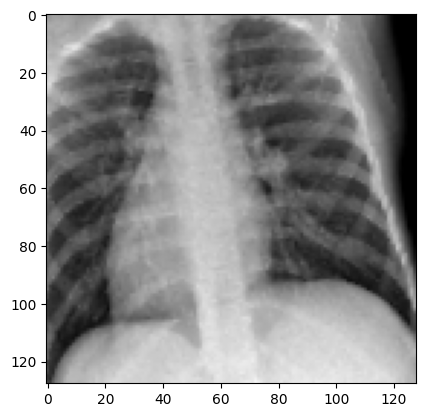

In [68]:
# Visualizando as imagens dentro do modelo
#x , y  = train_generator.next()
#for i in range(0,1):
#    random_image = x[i]
#    plt.imshow(random_image)
#    plt.show()

for i in range(0, 1):
    x, y = train_generator[i]  # Obtém um lote de dados do gerador
    random_image = x[0]  # Seleciona uma imagem aleatória do lote
    plt.imshow(random_image)
    plt.show()

In [69]:
#x , y = train_generator.next(): Esta linha obtém o próximo lote de imagens e seus rótulos do gerador de dados de treinamento (train_generator). O método next() retorna um lote de dados, que inclui as imagens e os rótulos correspondentes.
#for i in range(0,1):: Este loop é executado uma vez para mostrar uma única imagem aleatória do lote.
#random_image = x[i]: Seleciona uma imagem aleatória do lote atual.
#plt.imshow(random_image): Exibe a imagem selecionada usando a função imshow() do matplotlib.
#plt.show(): Mostra a imagem na janela de plotagem.

In [70]:
#Treinamento do modelo:

epochs=10 # quantidade de épocas de treinamento. É possível aumentar ou dimunir a quantidade.
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10


d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step - accuracy: 0.7520 - loss: 1.0245 - val_accuracy: 0.5333 - val_loss: 2.3190 - learning_rate: 0.0010
Epoch 2/10


d:\Python\Lib\site-packages\keras\src\callbacks\callback_list.py:97: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8000 - loss: 0.2348 - val_accuracy: 0.3000 - val_loss: 2.3215 - learning_rate: 0.0010


d:\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.8096 - loss: 0.7513 - val_accuracy: 0.5333 - val_loss: 6.0854 - learning_rate: 0.0010
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8000 - loss: 0.2401 - val_accuracy: 0.3000 - val_loss: 4.7341 - learning_rate: 0.0010
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.6976 - loss: 0.8002 - val_accuracy: 0.5333 - val_loss: 9.0086 - learning_rate: 0.0010
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6667 - loss: 0.7460 - val_accuracy: 0.3000 - val_loss: 5.5542 - learning_rate: 0.0010
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.8362 - loss: 0.5243 - val_accuracy: 0.5333 - val_loss: 10.1877 - learning_rate: 0.0010
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8667 - loss: 0.2476 - val_accuracy: 0.3000 - val_loss: 7.9205 - learning_rate: 0.0010
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.7950 - loss: 0.5417 - val

In [71]:
#train_generator: O gerador de dados de treinamento que produzirá lotes de dados de treinamento durante o treinamento do modelo.
#epochs=10: O número de épocas de treinamento. Uma época é uma passagem completa por todo o conjunto de treinamento.
#validation_data=validation_generator: O gerador de dados de validação que produzirá lotes de dados de validação durante o treinamento do modelo. Isso é usado para avaliar o desempenho do modelo em um conjunto de dados independente durante o treinamento.
#validation_steps=total_validate//batch_size: O número total de etapas de validação a serem executadas em cada época. É igual ao número total de amostras de validação dividido pelo tamanho do lote.
#steps_per_epoch=total_train//batch_size: O número total de etapas de treinamento a serem executadas em cada época. É igual ao número total de amostras de treinamento dividido 

In [72]:
#Salvando o modelo:

model.save("modelo_raio-x-torax_10epoch.h5") # documento gerado com a base de treinamento.

In [73]:
#model.save(): Método para salvar o modelo em um arquivo. Este método é fornecido pelo TensorFlow/Keras.
#modelo_raio-x-torax_10epoch.h5": Nome do arquivo HDF5 onde o modelo será salvo. Esse arquivo será salvo no diretório atual do seu script Python.

In [74]:
#Preparando os dados de teste:
dir_teste = "D:\\Dados\\raio-x-torax\\raio-x-torax\\teste\\"
test_filenames = os.listdir(dir_teste)
# note que o caminho para a pasta teste deverá novamente ser apontado. Atente-se para não apagar as aspas e barras duplas.

test_df = pd.DataFrame({
    'filename': test_filenames
})


In [75]:
#ir_teste = "D:\\Dados\\raio-x-torax\\raio-x-torax\\teste\\": Define o diretório onde estão localizadas as imagens de teste.
#test_filenames = os.listdir(dir_teste): Usa a função os.listdir() para listar todos os arquivos e diretórios no diretório de teste especificado em dir_teste. Isso retorna uma lista de strings contendo os nomes de todos os arquivos no diretório de teste.
#test_df = pd.DataFrame({'filename': test_filenames}): Cria um DataFrame do pandas com uma coluna chamada 'filename', onde cada linha contém o nome de um arquivo de imagem do diretório de teste.

In [76]:
#Testando os dados de treinamento:

test_generator = train_datagen.flow_from_dataframe(test_df,
                                                   dir_teste,
# note que o caminho agora é para a pasta TESTE. Atente-se para não apagar as aspas e barras duplas.
                                                   x_col='filename',
                                                   y_col=None,
                                                   target_size=Image_Size,
                                                   class_mode=None,
                                                   batch_size=batch_size
                                                   )

nb_samples = test_df.shape[0]


Found 100 validated image filenames.


In [77]:
#dir_teste: O caminho para o diretório de teste onde as imagens estão localizadas.
#x_col='filename': Nome da coluna que contém os nomes dos arquivos de imagem no DataFrame test_df.
#y_col=None: Como não há coluna de rótulos no DataFrame test_df, este argumento é definido como None.
#target_size=Image_Size: Tamanho alvo das imagens (largura, altura) que serão redimensionadas durante o carregamento.
#class_mode=None: Como não estamos prevendo rótulos neste caso, class_mode é definido como None.
#batch_size=batch_size: Tamanho do lote (batch size) usado durante o teste.

In [78]:
#Fazendo as previsões das categorias:

#predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/stepWARNING:tensorflow:6 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E3F97BD620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step


In [79]:
#model.predict(test_generator, steps=np.ceil(nb_samples/batch_size)): Este é o método usado para fazer previsões usando o modelo treinado.
#test_generator: É o gerador de dados de teste que fornece as imagens a serem previstas.
#steps=np.ceil(nb_samples/batch_size): O argumento steps define o número total de passos (batches) a serem previstos. Como não há um número inteiro de batches para processar todos os exemplos de teste, np.ceil(nb_samples/batch_size) é usado para arredondar para cima para garantir que todas as amostras sejam previstas.

In [80]:
#Convertendo os labels em categorias:

test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'pneumonia': 1, 'normal': 0 })

C:\Users\User\AppData\Local\Temp\ipykernel_7648\897708129.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['category'] = test_df['category'].replace({ 'pneumonia': 1, 'normal': 0 })


In [81]:
#test_df['category'] = np.argmax(predict, axis=-1): Esta linha usa a função argmax do numpy para encontrar o índice da classe com a maior probabilidade para cada amostra de teste. Isso retorna o índice da classe prevista para cada amostra.
#label_map = dict((v,k) for k,v in train_generator.class_indices.items()): Cria um mapeamento de índices de classe para rótulos de classe, invertendo o mapeamento que foi usado pelo gerador de dados de treinamento.
#test_df['category'] = test_df['category'].replace(label_map): Usa o mapeamento label_map para substituir os índices de classe previstos pelos rótulos de classe correspondentes.
#test_df['category'] = test_df['category'].replace({ 'pneumonia': 1, 'normal': 0 }): Substitui os rótulos de classe ('pneumonia' e 'normal') pelos valores numéricos correspondentes (1 e 0).

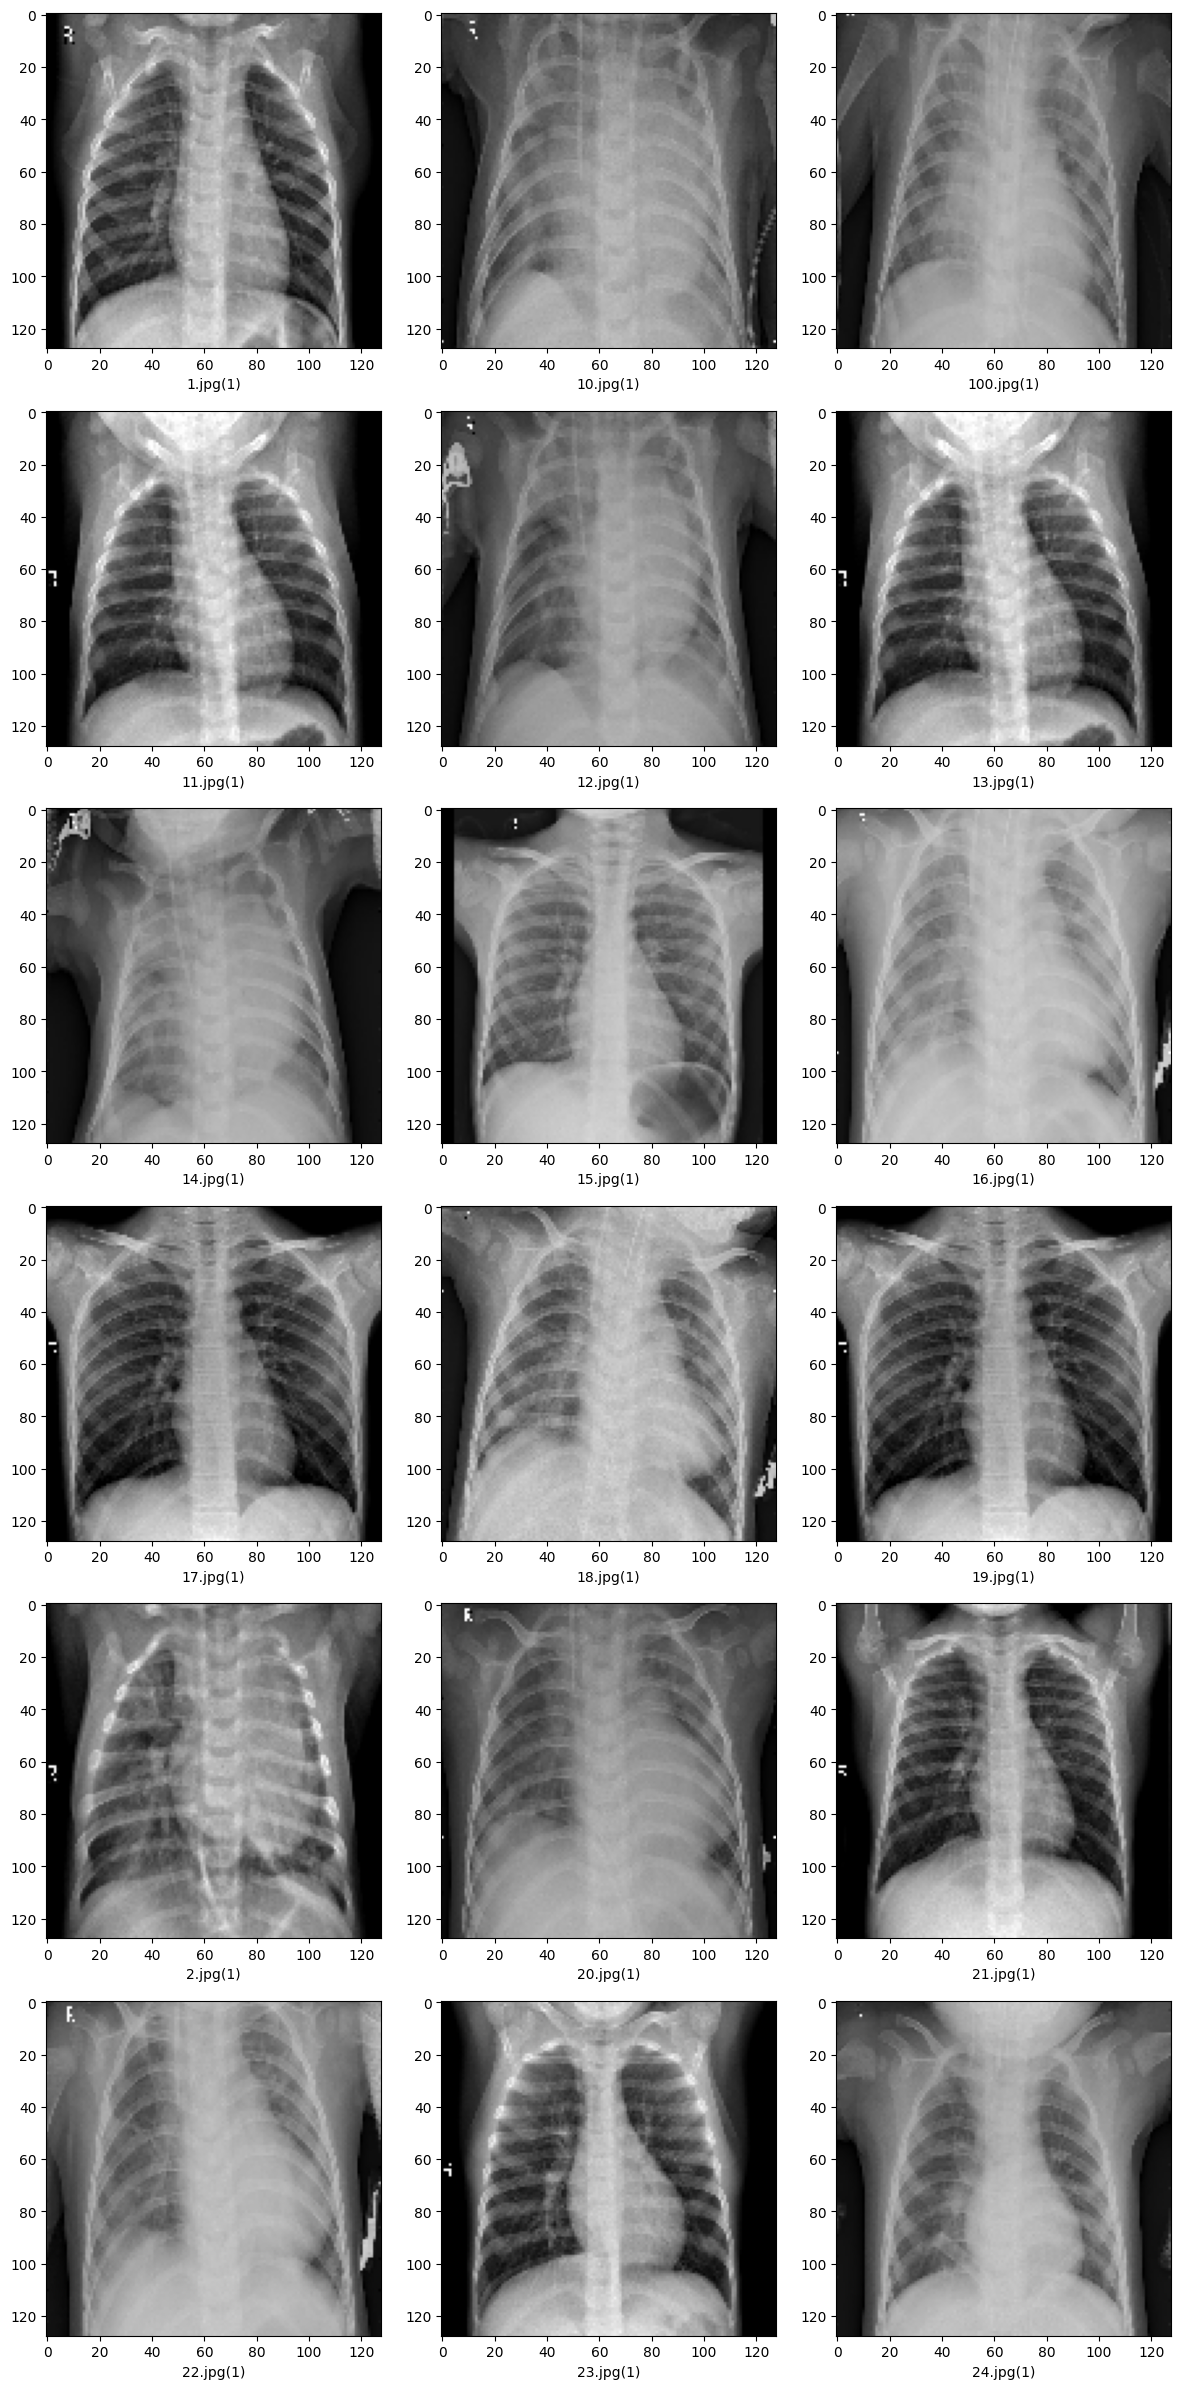

In [82]:
#Visualizando os resultados da previsão:

sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(dir_teste+filename, target_size=Image_Size)
# note que o caminho para a pasta TESTE deverá novamente ser apontado. Atente-se para não apagar as aspas e barras duplas.
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [83]:
#sample_test = test_df.head(18): Seleciona as primeiras 18 linhas do DataFrame test_df para criar uma amostra de teste.
#plt.figure(figsize=(12, 24)): Define o tamanho da figura que será plotada.
#for index, row in sample_test.iterrows():: Itera sobre cada linha do DataFrame sample_test.
#filename = row['filename']: Obtém o nome do arquivo de imagem da coluna 'filename' da linha atual.
#category = row['category']: Obtém a categoria predita da coluna 'category' da linha atual.
#img = load_img("C:\\Users\\Marcelo Viana\\Documents\\Projetos_Jupyter\\raio-x-torax\\teste\\"+filename, target_size=Image_Size): Carrega a imagem do arquivo usando o caminho do arquivo e o redimensiona para o tamanho especificado em Image_Size.
#plt.subplot(6, 3, index+1): Cria um subplot na posição especificada na grade de 6 linhas e 3 colunas, onde o índice é index+1.
#plt.imshow(img): Exibe a imagem carregada.
#plt.xlabel(filename + '(' + "{}".format(category) + ')' ): Define o rótulo do eixo x como o nome do arquivo de imagem e sua categoria predita.
#plt.tight_layout(): Ajusta automaticamente o layout da figura para que os subplots não se sobreponham.
#plt.show(): Exibe a figura.

In [84]:
# Funcao Gerar numero

import os
import random
from PIL import Image

def num_aleat(num_min,num_max):
    num_ger = random.randrange(num_min,num_max)
    return num_ger

#Funcao Escolher Arquivo Aleatorio 
def escolher_arquivo_aleatorio(caminho_da_pasta):
    # Lista todos os arquivos na pasta
    arquivos = os.listdir(caminho_da_pasta)
    
    # Filtra apenas os arquivos (remove pastas)
    arquivos = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(caminho_da_pasta, arquivo))]
    
    # Escolhe um arquivo aleatoriamente
    arquivo_aleatorio = random.choice(arquivos)
    
    # Retorna o caminho completo do arquivo escolhido
    return os.path.join(caminho_da_pasta, arquivo_aleatorio)

Arquivo escolhido aleatoriamente: D:\Dados\raio-x-torax\raio-x-torax\teste\83.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
[0.8309871  0.16901286]
Diagnóstico indicado: RX normal


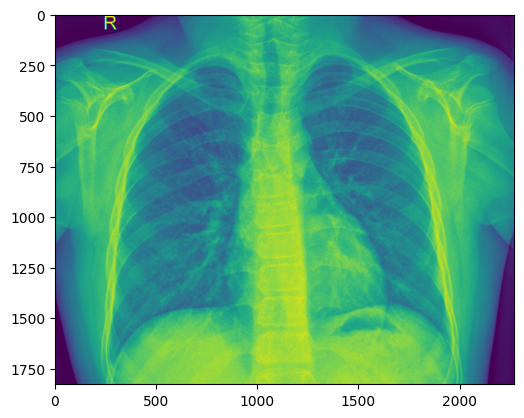

In [85]:
#Testando o desempenho do modelo em dados personalizados:

from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2

# Gera um numero aleatorio de 1 a 4 para os diretorios 
# Por funcao retorma o numero o numero aleatorio
num_ger = num_aleat(1,2)

if num_ger == 1 or num_ger == 2:
    caminho_da_pasta = dir_teste

# Apos diretorio aleatorio, escolhe arquivo aleatorio para analise
# Assim é possivel juntar mais de um diretório
arquivo_aleatorio = escolher_arquivo_aleatorio(caminho_da_pasta)
print("Arquivo escolhido aleatoriamente:", arquivo_aleatorio)


im=Image.open(arquivo_aleatorio)
# note que o caminho para a pasta TESTE deverá novamente ser apontado. Atente-se para não apagar as aspas e barras duplas.
# escolha uma imagem para testar se é um raio x normal ou com pneumonia
img=im
im=im.resize(Image_Size)
im=(np.random.standard_normal([128,128,3])*255)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict([im])[0]

print(pred)

if pred[0] > pred[1]:
    print ('Diagnóstico indicado: RX normal')
else:
    print('Diagnóstico indicado: RX pneumonia')

plt.imshow(img)
plt.show()

In [86]:
#im=Image.open("C:\\Users\\Marcelo Viana\\Documents\\Projetos_Jupyter\\raio-x-torax\\teste\\1.jpg"): Carrega a imagem com o caminho especificado.
#img=im: Salva a imagem original para exibição posterior.
#im=im.resize(Image_Size): Redimensiona a imagem para o tamanho especificado em Image_Size.
#im=(np.random.standard_normal([128,128,3])*255): Gera uma matriz aleatória de valores normalmente distribuídos para simular uma imagem. Esta linha está incorreta e parece ser uma substituição indevida da imagem carregada. Você pode removê-la.
#im=np.expand_dims(im,axis=0): Adiciona uma dimensão adicional para representar o número de amostras (1 amostra neste caso) à matriz da imagem.
#im=np.array(im): Converte a imagem para um array numpy.
#im=im/255: Normaliza os valores dos pixels da imagem para o intervalo [0, 1].
#pred=model.predict([im])[0]: Faz uma previsão usando o modelo treinado para a imagem normalizada. O resultado da previsão é uma lista contendo as probabilidades de cada classe.
#print(pred): Exibe as probabilidades previstas para cada classe.
#if pred[0] > pred[1]:: Verifica se a probabilidade prevista para a classe "normal" é maior do que a probabilidade prevista para a classe "pneumonia".
#plt.imshow(img): Exibe a imagem original.
#plt.show(): Mostra a imagem.

In [87]:
#Classificador GUI para imagens médicas

#Intalando o Tkinter Python:
import tkinter
tkinter.TkVersion

8.6

In [88]:
#Gerando a GUI:

import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
import os

from keras.models import load_model
model = load_model('modelo_raio-x-torax_10epoch.h5') # arquivo do modelo treinado

# Inicializando a GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Classificação para raio-x de tórax')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = (np.random.standard_normal([128,128,3])*255)
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict([image])[0]
    basename = os.path.basename(file_path)
    name = int(basename.rsplit('.', 1)[0]) 
    if name % 2:
         sign = 'Diagnóstico indicado: RX normal,'
    else:
         sign = 'Diagnóstico indicado: RX pneumonia,'
    print(sign)
    label.configure(foreground='#011638', text=f'{sign} {str(max(pred*100))} {str("%")}') 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classificar imagem",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    
    except:
        pass
upload=Button(top,text="Upload da imagem",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Classificação para raio-x de tórax",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

In [89]:
#Ele cria uma janela Tkinter (top) com dimensões e título definidos.
#Define uma função classify(file_path) para classificar a imagem selecionada com base no modelo previamente treinado.
#Define uma função show_classify_button(file_path) para mostrar o botão de classificação após o upload da imagem.
#Define uma função upload_image() para permitir ao usuário selecionar uma imagem para classificar.
#Configura os botões e rótulos na interface gráfica.
#Inicia o loop principal do Tkinter (top.mainloop()) para manter a interface gráfica interativa.

In [90]:
#Calcular Tempo 
data_hora_atual_fim = datetime.datetime.now()
print("\n Fim",data_hora_atual_fim)
tempo = data_hora_atual_fim - data_hora_atual_ini
print('\n Tempo',tempo)



 Fim 2024-04-05 00:22:42.234926

 Tempo 0:00:47.057586
